In [2]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [46]:
clusternames = ["adj_ERPositive", "adj_PRPositive", "adj_HER2Positive", "adj_Triple Neg"]

gsea_frames = {}
for cluster in clusternames:
    df = pd.read_csv(f"GSEA_/{cluster}/gseapy.gsea.gene_set.report.csv", index_col=0).iloc[:,:-3]
    indexlist = []
    for i in df.index:
        new_i = i.rstrip(" ")
        indexlist.append(new_i)
    df.index = indexlist
    print(df.index)
    df['fdr'] = df.apply(lambda row: 5.0 if (row['fdr'] == 0.0) else -np.log10(row['fdr']), axis=1)
    df = df.loc[~df.index.duplicated(keep='first')]
    gsea_frames[cluster] = df
    
gsea_df = pd.DataFrame(index= gsea_frames['adj_ERPositive'].index)
for i in gsea_frames:
    gsea_df[i] = gsea_frames[i][f'fdr']

Index(['Activation of the pre-replicative complex',
       'Cell surface interactions at the vascular wall',
       'DNA Replication Pre-Initiation',
       'Immunoregulatory interactions between a Lymphoid and a non-Lymphoid cell',
       'Interleukin-10 signaling', 'Nuclear Envelope Breakdown',
       'Assembly of the pre-replicative complex',
       'tRNA processing in the nucleus', 'Signaling by Interleukins',
       'Amplification  of signal from unattached  kinetochores via a MAD2  inhibitory signal',
       ...
       'Negative regulation of activity of TFAP2 (AP-2) family transcription factors',
       'MyD88 deficiency (TLR5)',
       'Entry of Influenza Virion into Host Cell via Endocytosis',
       'Long-term potentiation', 'Glucuronidation',
       'Synthesis of PIPs at the early endosome membrane',
       'Signaling by cytosolic FGFR1 fusion mutants',
       'Neurexins and neuroligins',
       'RUNX2 regulates genes involved in differentiation of myeloid cells',
       'Re

In [47]:
gsea_df.columns = ["ER", "PR", "HER2", "Triple Neg"]
gsea_df

,ER,PR,HER2,Triple Neg
Activation of the pre-replicative complex,5.0,5.000000,1.622301,3.282650
Cell surface interactions at the vascular wall,5.0,1.972859,2.899743,2.239015
DNA Replication Pre-Initiation,5.0,5.000000,5.000000,3.384107
Immunoregulatory interactions between a Lymphoid and a non-Lymphoid cell,5.0,5.000000,2.843885,5.000000
Interleukin-10 signaling,5.0,3.604798,0.807129,5.000000
...,...,...,...,...
Synthesis of PIPs at the early endosome membrane,-0.0,0.026300,0.170997,0.030985
Signaling by cytosolic FGFR1 fusion mutants,-0.0,0.043131,0.126391,0.022732
Neurexins and neuroligins,-0.0,0.060085,0.295081,0.037112
RUNX2 regulates genes involved in differentiation of myeloid cells,-0.0,0.112589,0.063539,-0.000000


In [48]:
wall_hormones = pd.read_csv('../exp/adjusted_distributions_receptors.csv', index_col = 0)
wall_hormones.columns = ["ER", "PR", "HER2", "Triple Neg"]
wall_hormones

,ER,PR,HER2,Triple Neg
SLC-mediated transmembrane transport,37.405786,13.252255,0.663079,26.968505
"Transport of bile salts and organic acids, metal ions and amine compounds",32.452070,9.880556,0.113069,23.280225
Sphingolipid metabolism,29.140881,8.853328,0.010495,22.599006
Cyclin D associated events in G1,35.525142,14.523865,0.815315,22.485267
G1 Phase,35.525142,14.523865,0.815315,22.485267
...,...,...,...,...
Protein ubiquitination,0.075795,0.051607,0.029685,0.000851
Transcriptional regulation of granulopoiesis,0.033070,0.503143,0.031908,0.000787
Late endosomal microautophagy,0.141577,0.716284,0.011522,0.000651
"Unblocking of NMDA receptors, glutamate binding and activation",0.484781,0.694761,1.059343,0.000431


In [49]:
wall_hormones_counts = {}

for column in wall_hormones.columns:
    columnshape = wall_hormones[wall_hormones[column] >= 3].shape[0]
    wall_hormones_counts[column] = columnshape
wall_hormones_counts

{'ER': 706, 'PR': 455, 'HER2': 44, 'Triple Neg': 508}

In [50]:
gsea_counts = {}

for column in gsea_df.columns:
    columnshape = gsea_df[gsea_df[column] >= 3].shape[0]
    gsea_counts[column] = columnshape
gsea_counts

{'ER': 41, 'PR': 23, 'HER2': 41, 'Triple Neg': 39}

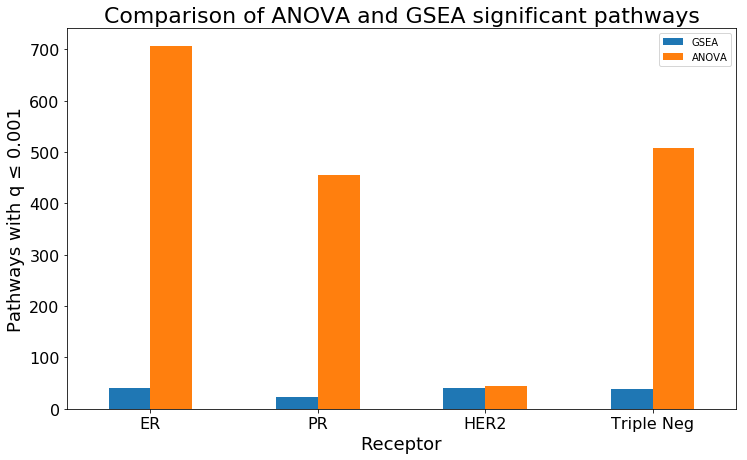

In [58]:
full_df = pd.DataFrame({'GSEA': gsea_counts, 'ANOVA': wall_hormones_counts})
ax = full_df.plot.bar(rot=0, figsize=(12, 7))
ax.set_xlabel("Receptor", fontsize=18)
ax.set_ylabel("Pathways with q ≤ 0.001", fontsize=18)
ax.set_title('Comparison of ANOVA and GSEA significant pathways', fontsize=22)
ax.tick_params(labelsize=16)
fig = ax.get_figure()
fig.show()

In [59]:
fig = ax.get_figure()
fig.savefig('gsea_wall_anova_hormone_comparison.png')

In [52]:
compare_sig_pathways = {}
for i in gsea_df.columns:
    print(i)
    gsea_cluster = gsea_df[gsea_df[i] > 3].index.tolist()
    anova_cluster = wall_hormones[wall_hormones[i] > 3].index.tolist()
    count = 0
    for index in anova_cluster:
        if index in gsea_cluster:
            count += 1
    compare_sig_pathways[i] = count

compare_sig_pathways

ER
PR
HER2
Triple Neg


{'ER': 38, 'PR': 18, 'HER2': 0, 'Triple Neg': 34}

In [53]:
venn_dict = {}
for i in compare_sig_pathways.keys():
    venn_list = [wall_hormones_counts[i]-compare_sig_pathways[i], gsea_counts[i] - compare_sig_pathways[i], compare_sig_pathways[i]]
    venn_dict[i] = venn_list
venn_dict 

{'ER': [668, 3, 38],
 'PR': [437, 5, 18],
 'HER2': [44, 41, 0],
 'Triple Neg': [474, 5, 34]}

In [54]:
overlap_df = pd.DataFrame(index = gsea_counts.keys())
overlap_df['Overlap'] = compare_sig_pathways.values()
overlap_df['GSEA'] = gsea_counts.values() 
overlap_df['ANOVA'] = wall_hormones_counts.values() 
overlap_df['GSEA exclusive'] = overlap_df['GSEA'] - overlap_df['Overlap']
overlap_df['ANOVA exclusive'] = overlap_df['ANOVA'] - overlap_df['Overlap']

overlap_df

,Overlap,GSEA,ANOVA,GSEA exclusive,ANOVA exclusive
ER,38,41,706,3,668
PR,18,23,455,5,437
HER2,0,41,44,41,44
Triple Neg,34,39,508,5,474
